# Change pixel spacing Control images

In [ ]:
# install dependencies, just run when neccesary
conda install git
pip install git+https://github.com/tueimage/elastix-py

In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import tempfile
import shutil
import glob
from os import listdir
from os.path import isfile, join
import nibabel as nib
from PIL import Image
from sklearn.cluster import KMeans
from scipy.ndimage import gaussian_filter

from __future__ import print_function, absolute_import
import elastix
import imageio
import SimpleITK as sitk
import fileinput
import pandas as pd
import tempfile
import shutil

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device) #Device used: using GPU will significantly speed up the training.

cuda


In [2]:
# FILL IN DESIRED PATHS NAMES
path_to_im_control = r"C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\nii"
path_to_im_scoliose = r"C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose"

# Parameters for image cropping
image_to_crop = 4
# Set cropping bounds. do it by trial and error
z_min = 65  # Minimum z index to keep
z_max = 30 # Maximum z index to keep 

# Elastix parameter file path for affine registration
parameter_file_path = r'C:\Users\raque\OneDrive\Escritorio\UU\team challenge\registration\params_affine2.txt'



In [3]:
control_images_path = []

images_names_control= [f for f in listdir(path_to_im_control) if isfile(join(path_to_im_control, f))]
for i in images_names_control:
    images_path_control = sorted(glob.glob(os.path.join(path_to_im_control, i)))
    control_images_path.append(images_path_control)
    
#print(control_images)

print(images_names_control)

['Control1a.nii', 'Control2a.nii', 'Control3a.nii', 'Control4a.nii', 'Control5a.nii', 'Control6a.nii', 'Control7a.nii', 'Control8a.nii']


In [4]:
images_processed_control = []
for i in (images_names_control):
    name = i.split('.')[0]
    images_processed_control.append(join(path_to_im_control, "processed", name +"_processed"+ ".nii"))
    
print(images_processed_control)

['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control1a_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control2a_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control3a_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control4a_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control5a_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control6a_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control7a_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scol

In [5]:
if not os.path.exists(path_to_im_control + '\processed'):
        os.makedirs(path_to_im_control + '\processed')

# Crop ROI Control image 4

Only crop image 4

In [12]:
control_images_path = []

images_names= [f for f in listdir(path_to_im_control) if isfile(join(path_to_im_control, f))]
for i in images_names:
    images_paths = sorted(glob.glob(os.path.join(path_to_im_control, i)))
    control_images_path.append(images_paths)
    
print(control_images_path)

[['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\Control1a.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\Control2a.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\Control3a.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\Control4a.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\Control5a.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\Control6a.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\Control7a.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\Control8a.nii']]


In [15]:
# select image 4
nifti_image = nib.load(control_images_path[image_to_crop - 1][0])
affine = nifti_image.affine

# get the image data and header information
image_data = nifti_image.get_fdata()
image_header = nifti_image.header

dim_x, dim_y, dim_z = nifti_image.shape[:3]


In [16]:
z_max2 = dim_z - z_max
# Crop image
data_cropped = image_data[:, :, z_min:z_max2]

# Create new NIfTI image with cropped data
img_cropped = nib.Nifti1Image(data_cropped, affine)

nib.save(img_cropped, control_images_path[image_to_crop - 1][0])

## Pixel spacing

In [17]:
# read the nii files
z_dim_preop= 518
pix_sp_preop=0.600006104

# load the nifti file
for num, name in enumerate (control_images_path):
    nifti_image = nib.load(name[0])
    dim_x, dim_y, dim_z = nifti_image.shape[:3]
    
    # get the image data and header information
    image_data = nifti_image.get_fdata()
    image_header = nifti_image.header
    
    current_pixel_spacing = np.array(image_header.get_zooms())
    
    # get new pixel spacing
    new_z_pix_sp= (z_dim_preop/dim_z)*pix_sp_preop
    
    # update
    new_pixel_spacing = np.array([current_pixel_spacing[0], current_pixel_spacing[1], new_z_pix_sp])
    image_header.set_zooms(tuple(new_pixel_spacing))
    
    #save new image
    nib.save(nifti_image, images_processed_control[num])
    

# Denoising filter for Scoliose images

In [18]:
images_names_preop = []
images_names_postop = []
scoliose_preop_path = []
scoliose_postop_path = []

# Loop through each file in the directory
for filename in os.listdir(path_to_im_scoliose):
    if filename.endswith('preop.nii'):
        images_names_preop.append(filename)
    if filename.endswith('postop.nii'):
        images_names_postop.append(filename)
        
for i in images_names_preop:
    images_paths = sorted(glob.glob(os.path.join(path_to_im_scoliose, i)))
    scoliose_preop_path.append(images_paths)
    
for i in images_names_postop:
    images_paths = sorted(glob.glob(os.path.join(path_to_im_scoliose, i)))
    scoliose_postop_path.append(images_paths)

In [19]:
images_processed_preop = []
images_processed_postop = []

for i in (images_names_preop):
    name, extension = os.path.splitext(i)
    images_processed_preop.append(join(path_to_im_scoliose, "processed", name +"_processed"+ ".nii"))

for i in (images_names_postop):
    name, extension = os.path.splitext(i)
    images_processed_postop.append(join(path_to_im_scoliose, "processed", name +"_processed"+ ".nii"))

print(images_processed_preop)
print(images_processed_postop)

if not os.path.exists(path_to_im_scoliose + '\processed'):
        os.makedirs(path_to_im_scoliose + '\processed')

['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\processed\\1preop_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\processed\\2preop_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\processed\\3preop_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\processed\\4preop_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\processed\\5preop_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\processed\\7preop_processed.nii', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\processed\\9preop_processed.nii']
['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team c

In [20]:
for num, name in enumerate (scoliose_preop_path):   
    nifti_image = nib.load(name[0])
    image_data = nifti_image.get_fdata()
    image_header = nifti_image.header
    affine = nifti_image.affine
    
    denoised_image=gaussian_filter(image_data, sigma=1)
    denoised_image = nib.Nifti1Image(denoised_image, affine, image_header)
    
    nib.save(denoised_image, images_processed_preop[num])
    
for num, name in enumerate (scoliose_postop_path):   
    nifti_image = nib.load(name[0])
    image_data = nifti_image.get_fdata()
    image_header = nifti_image.header
    affine = nifti_image.affine
    
    denoised_image=gaussian_filter(image_data, sigma=1)
    denoised_image = nib.Nifti1Image(denoised_image, affine, image_header)
    
    nib.save(denoised_image, images_processed_postop[num])

# Affine transformation

ELASTIX


In [21]:
ELASTIX_PATH = r'C:\Users\raque\OneDrive\Escritorio\UU\capita\elastix-5.0.0-win64\elastix.exe'
if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
    
if os.path.exists('results') is False:
    os.mkdir('results')
    
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

###  REGISTER CONTROL IMAGES

In [24]:
# read control iamges processed

path_to_im_control_processed = path_to_im_control + '\processed'

control_images_path = []

images_names_control = [f for f in listdir(path_to_im_control_processed) if isfile(join(path_to_im_control_processed, f))]
for i in images_names_control:
    images_paths = sorted(glob.glob(os.path.join(path_to_im_control_processed, i)))
    control_images_path.append(images_paths)
    
print(control_images_path)

[['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control1a_processed.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control2a_processed.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control3a_processed.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control4a_processed.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control5a_processed.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control6a_processed.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control7a_processed.nii'], ['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team c

In [25]:
# take as the fixed image Control image 1
fixed_image_path = control_images_path[0][0]
# remove that first control image from the list
control_images_path.pop(0)

['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\processed\\Control1a_processed.nii']

In [26]:
images_registered_control = []

for i in (images_names_control):
    name, extension = os.path.splitext(i)
    name, extension = os.path.splitext(name)
    images_registered_control.append(join(path_to_im_control, "registered", name +"_registered"))
    
# remove first
images_registered_control.pop(0)

print(images_registered_control)

['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control2a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control3a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control4a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control5a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control6a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control7a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control8a_processed_registered']


In [27]:
# We will register all control images to the first Control image
for num, name in enumerate (control_images_path):
    moving_image_path = name[0]
    
    if not os.path.exists(images_registered_control[num]):
        os.makedirs(images_registered_control[num])
    
    result_path_affine = images_registered_control[num]
    
    el.register(
        fixed_image=fixed_image_path,
        moving_image=moving_image_path,
        parameters=[parameter_file_path],
        output_dir=result_path_affine)
    

C:\Users\raque\OneDrive\Escritorio\UU\capita\elastix-5.0.0-win64\elastix.exe -f C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\nii\processed\Control1a_processed.nii -m C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\nii\processed\Control2a_processed.nii -p C:\Users\raque\OneDrive\Escritorio\UU\team challenge\registration\params_affine2.txt -out C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\nii\registered\Control2a_processed_registered
C:\Users\raque\OneDrive\Escritorio\UU\capita\elastix-5.0.0-win64\elastix.exe -f C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\nii\processed\Control1a_processed.nii -m C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\nii\processed\Control3a_processed.nii -p C:\Users\raque\OneDrive\Escritorio\UU\team challenge\registration\params_affine2.txt -out C:\Users\raque\OneDrive\Escritorio\UU\team challen

In [52]:
path_to_im_control_registered = path_to_im_control + '\\registered'
registered_images= [x[0] for x in os.walk(path_to_im_control_registered)]
registered_images.pop(0)
print(registered_images)

['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control2a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control3a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control4a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control5a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control6a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control7a_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\nii\\registered\\Control8a_processed_registered']


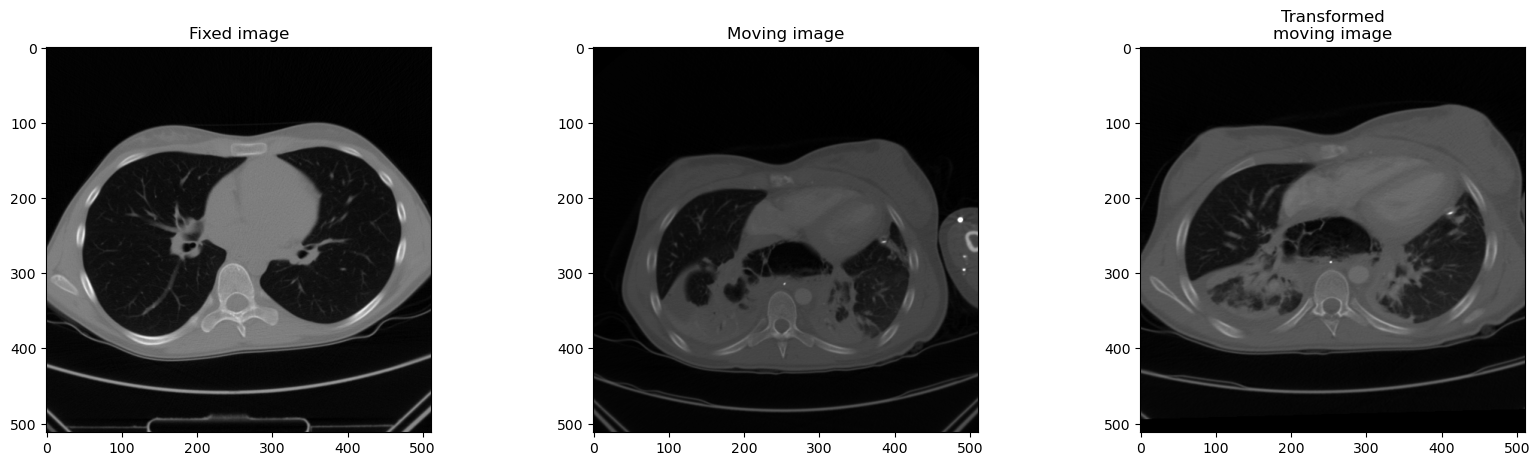

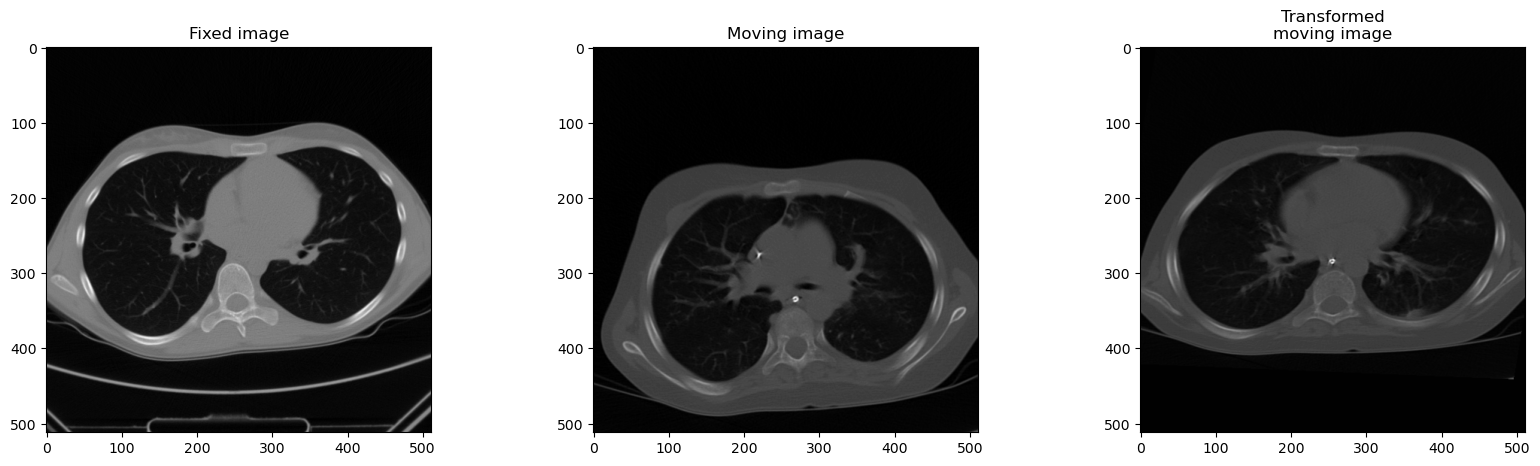

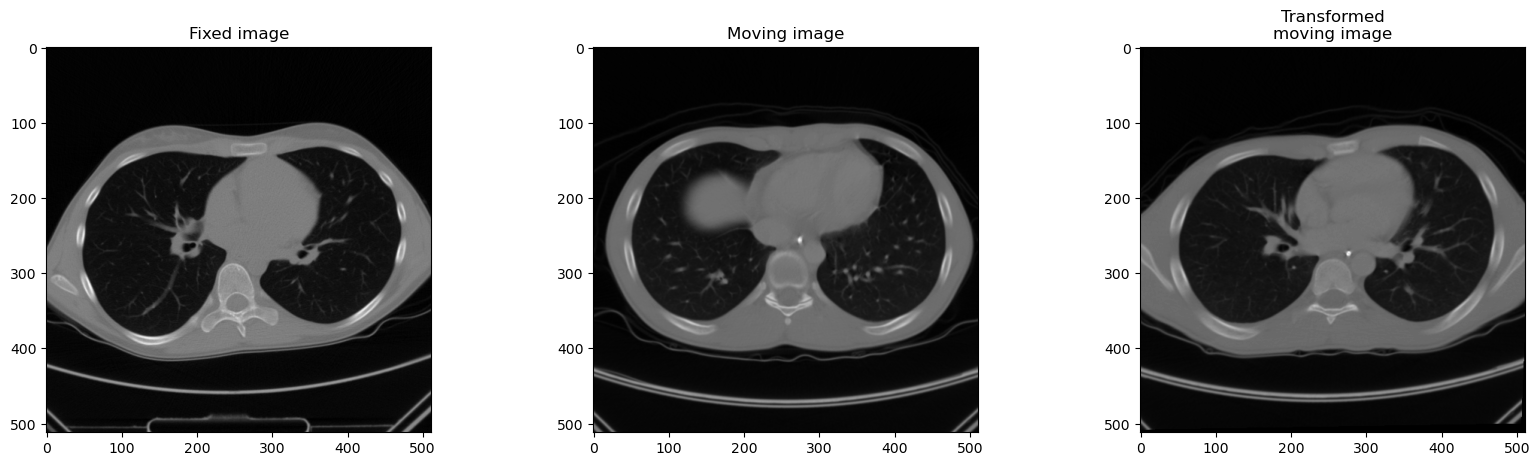

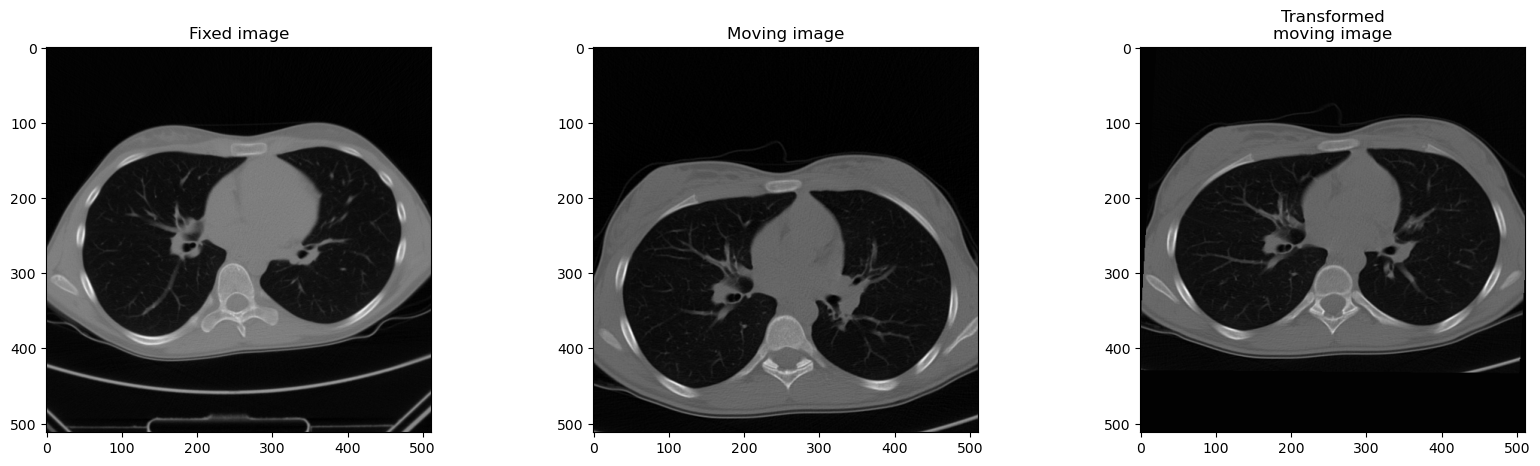

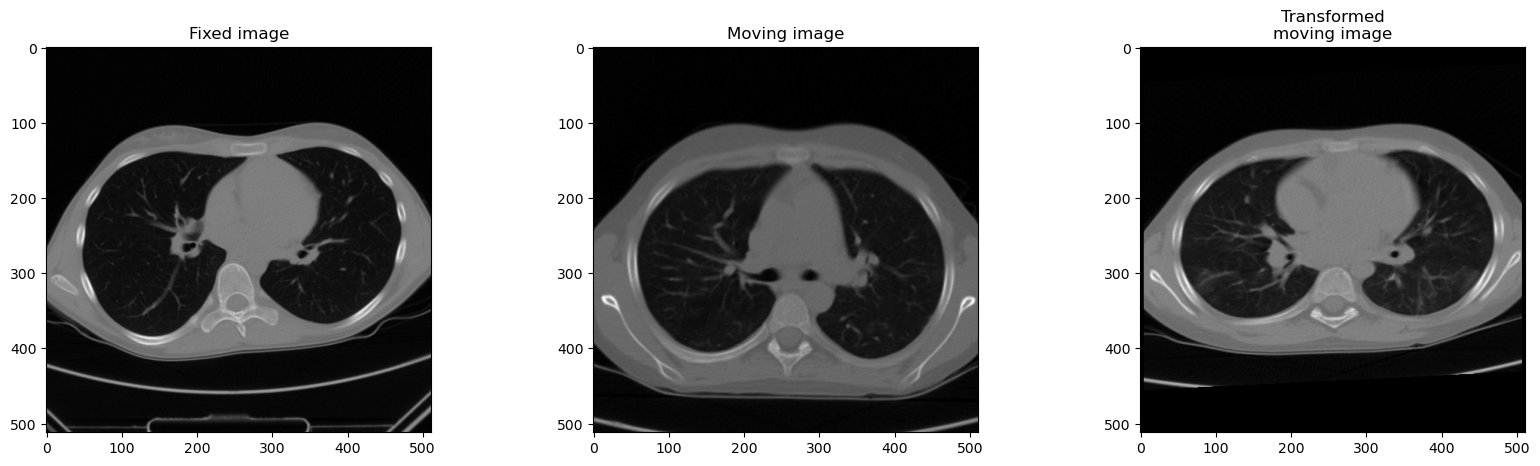

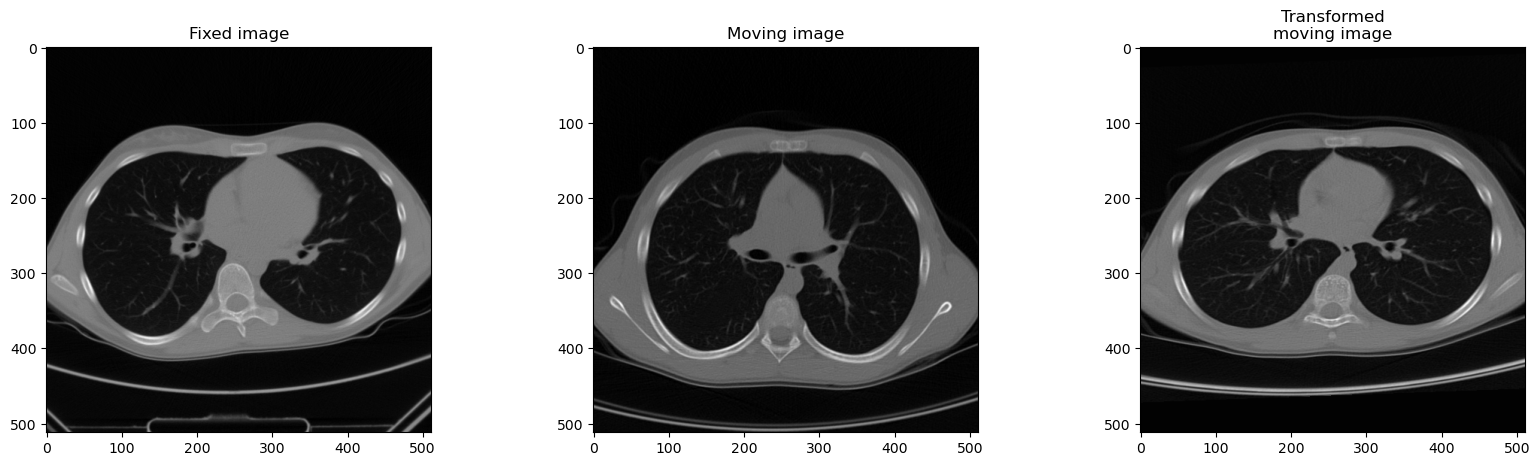

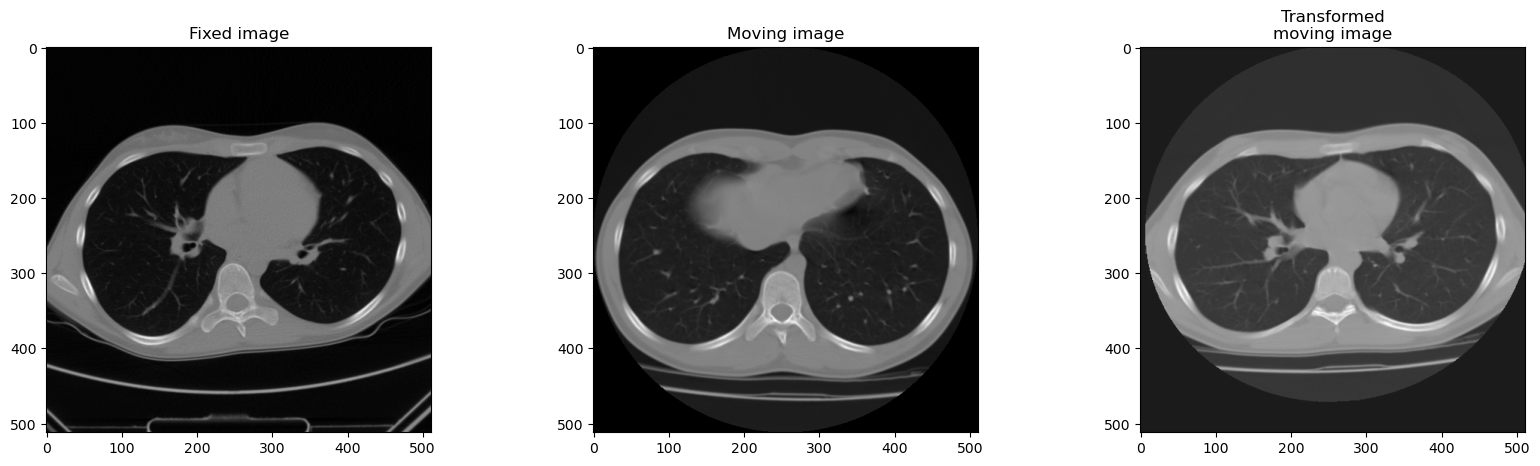

In [54]:
# Visualize results

for num, image in enumerate(registered_images):

    fixed_image = imageio.v2.imread(fixed_image_path)[40,:,:]
    
    moving_image = imageio.v2.imread(control_images_path[num][0])[40,:,:]
    
    result_path_affine = os.path.join(image, 'result.0.nii')
    
    transformed_moving_image = imageio.v2.imread(result_path_affine)[40,:,:]
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(fixed_image, cmap='gray')
    ax[0].set_title('Fixed image')
    ax[1].imshow(moving_image, cmap='gray')
    ax[1].set_title('Moving image')
    ax[2].imshow(transformed_moving_image, cmap='gray')
    ax[2].set_title('Transformed\nmoving image')

    plt.show()

# REGISTER SCOLIOTIC IMAGES

### Register preop scolitic images

In [130]:
# read control iamges processed
path_to_im_scoliose_processed = path_to_im_scoliose + '\processed'

images_names_preop = []
scoliose_preop_path = []

# Loop through each file in the directory
for filename in os.listdir(path_to_im_scoliose_processed):
    if filename.endswith('preop_processed.nii'):
        images_names_preop.append(filename)
        
for i in images_names_preop:
    images_paths = sorted(glob.glob(os.path.join(path_to_im_scoliose_processed, i)))
    scoliose_preop_path.append(images_paths)

In [131]:
images_registered_preop= []

for i in (images_names_preop):
    name, extension = os.path.splitext(i)
    name, extension = os.path.splitext(name)
    images_registered_preop.append(join(path_to_im_scoliose, "registered", name +"_registered"))
    
# remove first
images_registered_preop.pop(0)


'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\registered\\1preop_processed_registered'

In [132]:
# take as the fixed image preop image 1
fixed_image_preop_path = scoliose_preop_path[0][0]
# remove that first preop image from the list
first_preop_image = scoliose_preop_path.pop(0)
print(first_preop_image)


['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\processed\\1preop_processed.nii']


In [82]:
# We will register all preop images to the first preop image
for num, name in enumerate (scoliose_preop_path):
    moving_image_path = name[0]
    
    if not os.path.exists(images_registered_preop[num]):
        os.makedirs(images_registered_preop[num])
    
    result_path_affine = images_registered_preop[num]
    
    el.register(
        fixed_image=fixed_image_preop_path,
        moving_image=moving_image_path,
        parameters=[parameter_file_path],
        output_dir=result_path_affine)
    

C:\Users\raque\OneDrive\Escritorio\UU\capita\elastix-5.0.0-win64\elastix.exe -f C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\processed\1preop_processed.nii -m C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\processed\2preop_processed.nii -p C:\Users\raque\OneDrive\Escritorio\UU\team challenge\registration\params_affine2.txt -out C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\registered\2preop_processed_registered
C:\Users\raque\OneDrive\Escritorio\UU\capita\elastix-5.0.0-win64\elastix.exe -f C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\processed\1preop_processed.nii -m C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\processed\3preop_processed.nii -p C:\Users\raque\OneDrive\Escritorio\UU\team challenge\registration\params_affine2.txt -out C:\Users\raque\OneDrive\Escritorio\UU\te

In [93]:
path_to_im_scoliose_preop_registered = path_to_im_scoliose + '\\registered'
registered_images_preop = [x[0] for x in os.walk(path_to_im_scoliose_preop_registered)]
print(registered_images_preop)
registered_images_preop.pop(0)

['C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\registered\\2preop_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\registered\\3preop_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\registered\\4preop_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\registered\\5preop_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\registered\\7preop_processed_registered', 'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\registered\\9preop_processed_registered']


'C:\\Users\\raque\\OneDrive\\Escritorio\\UU\\team challenge\\Team challenge - scoliosis\\Scoliose\\registered'

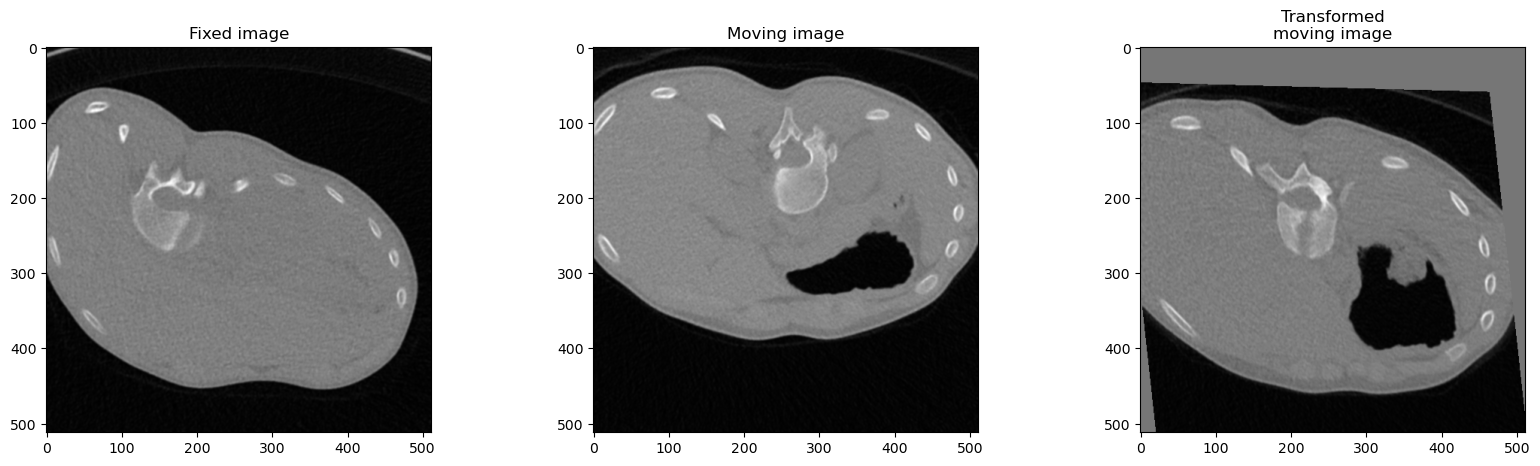

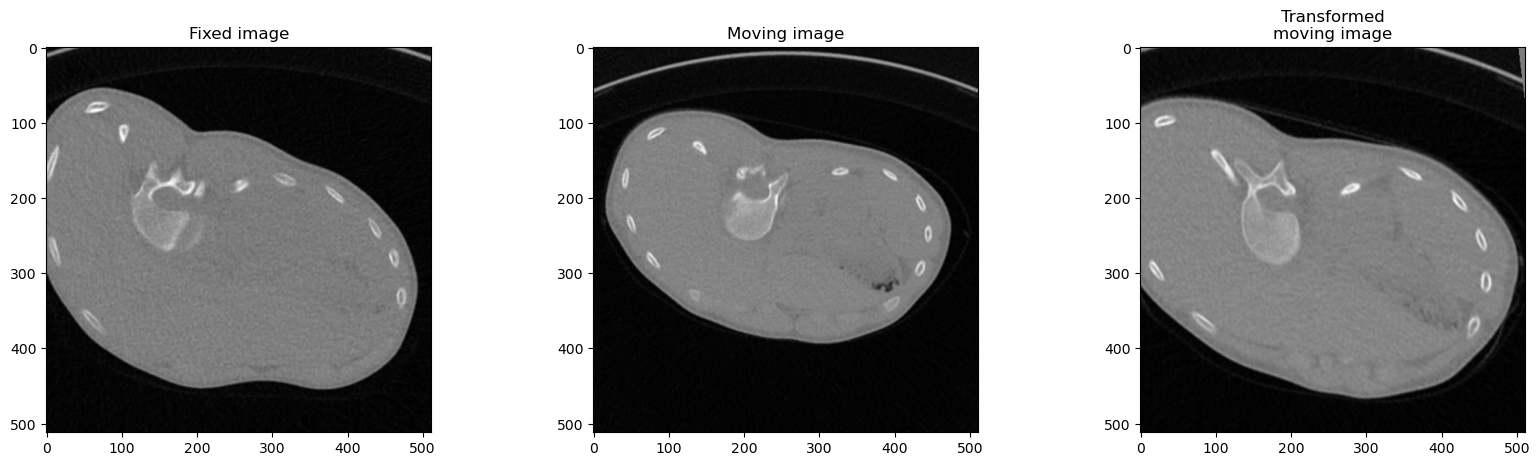

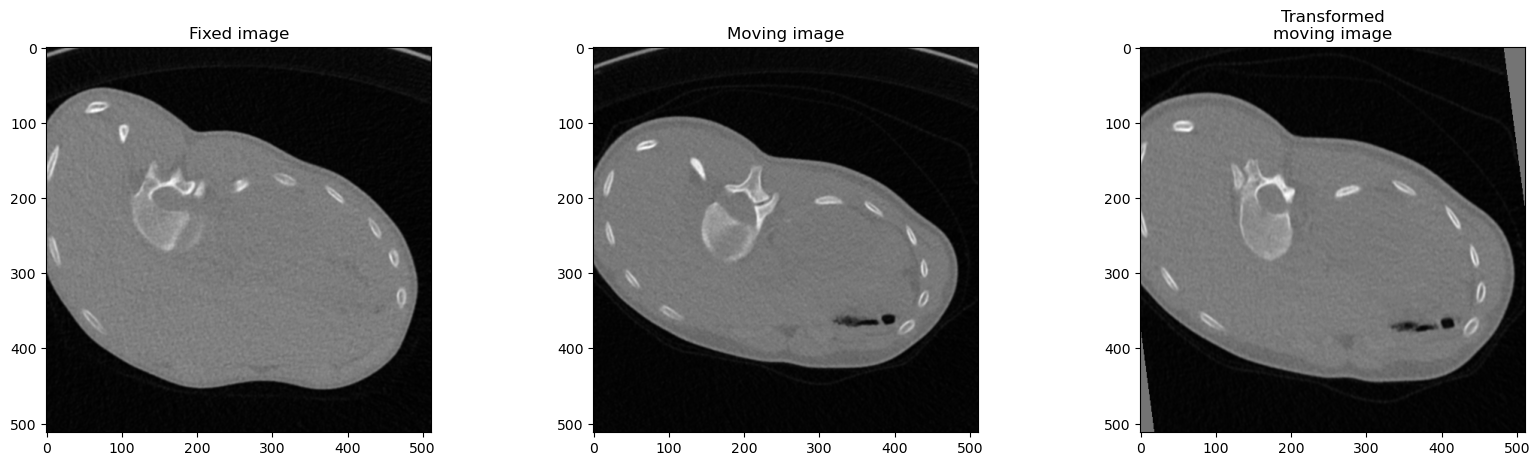

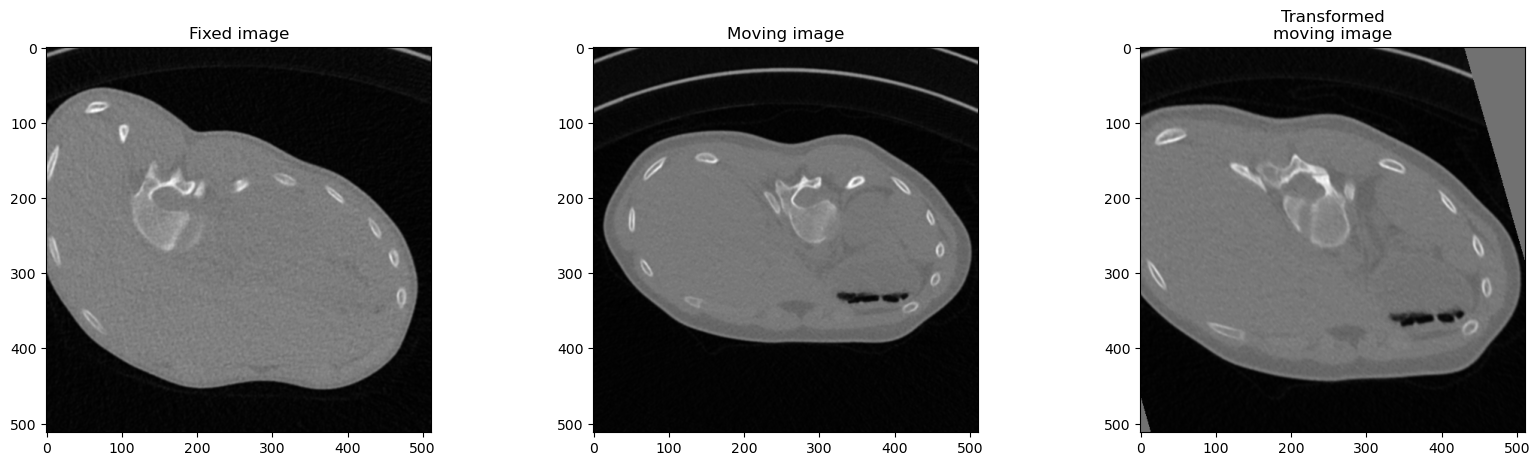

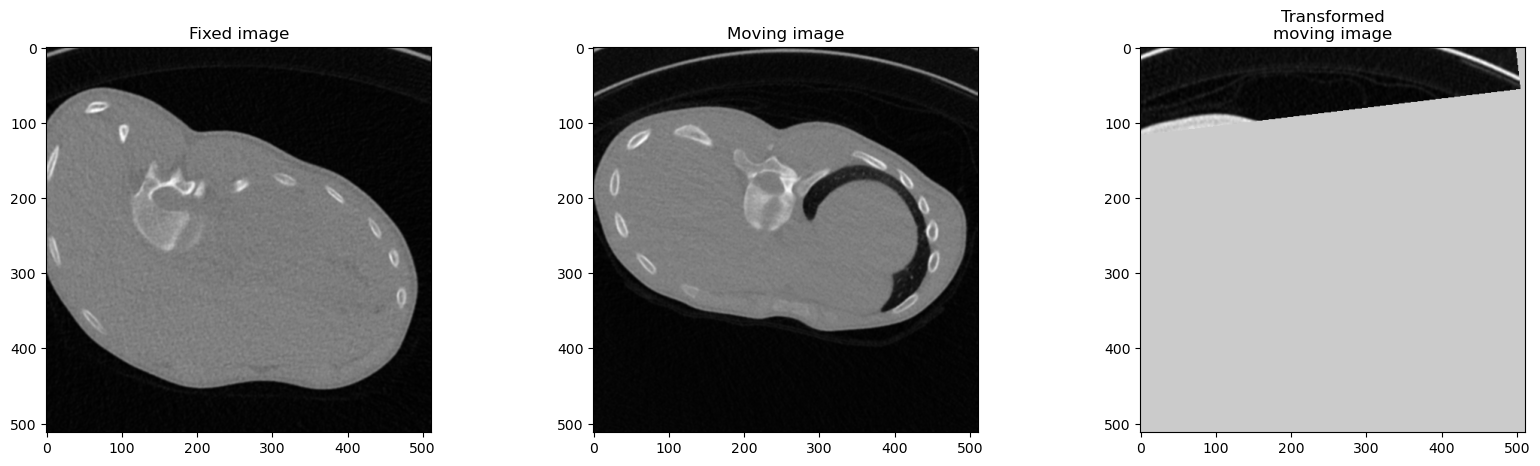

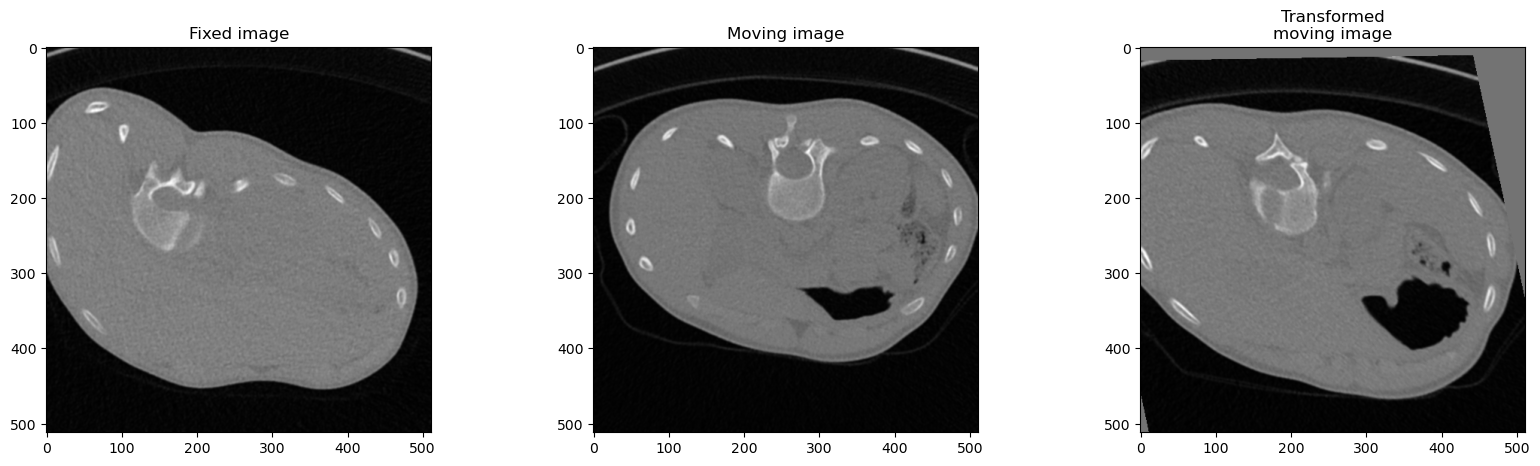

In [94]:
# Visualize results
print()
for num, image in enumerate(registered_images_preop):

    fixed_image = imageio.v2.imread(fixed_image_preop_path)[40,:,:]
    
    moving_image = imageio.v2.imread(scoliose_preop_path[num][0])[40,:,:]
    
    result_path_affine = os.path.join(image, 'result.0.nii')
    
    transformed_moving_image = imageio.v2.imread(result_path_affine)[40,:,:]
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(fixed_image, cmap='gray')
    ax[0].set_title('Fixed image')
    ax[1].imshow(moving_image, cmap='gray')
    ax[1].set_title('Moving image')
    ax[2].imshow(transformed_moving_image, cmap='gray')
    ax[2].set_title('Transformed\nmoving image')

    plt.show()

### Register postop scolitic images

In [128]:
images_names_postop = []
scoliose_postop_path = []

for filename in os.listdir(path_to_im_scoliose_processed):
    if filename.endswith('postop_processed.nii'):
        images_names_postop.append(filename)
        
for i in images_names_postop:
    images_paths = sorted(glob.glob(os.path.join(path_to_im_scoliose_processed, i)))
    scoliose_postop_path.append(images_paths)
    
images_registered_postop= []

for i in (images_names_postop):
    name, extension = os.path.splitext(i)
    name, extension = os.path.splitext(name)
    images_registered_postop.append(join(path_to_im_scoliose, "registered", name +"_registered"))

In [134]:
registered_images_preop2 = [first_preop_image] + registered_images_preop

for num, name in enumerate (scoliose_postop_path):
    if num == 0:
        el.register(
            fixed_image=first_preop_image[0],
            moving_image=name[0],
            parameters=[parameter_file_path],
            output_dir=images_registered_postop[num])
    else:
        fixed_image_path = registered_images_preop2[num]
        fixed_image_path = os.path.join(fixed_image_path, 'result.0.nii')

        moving_image_path = name[0]

        if not os.path.exists(images_registered_postop[num]):
            os.makedirs(images_registered_postop[num])

        result_path_affine = images_registered_postop[num]

        el.register(
            fixed_image=fixed_image_path,
            moving_image=moving_image_path,
            parameters=[parameter_file_path],
            output_dir=result_path_affine)
    

C:\Users\raque\OneDrive\Escritorio\UU\capita\elastix-5.0.0-win64\elastix.exe -f C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\processed\1preop_processed.nii -m C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\processed\1postop_processed.nii -p C:\Users\raque\OneDrive\Escritorio\UU\team challenge\registration\params_affine2.txt -out C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\registered\1postop_processed_registered
C:\Users\raque\OneDrive\Escritorio\UU\capita\elastix-5.0.0-win64\elastix.exe -f C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\registered\2preop_processed_registered\result.0.nii -m C:\Users\raque\OneDrive\Escritorio\UU\team challenge\Team challenge - scoliosis\Scoliose\processed\2postop_processed.nii -p C:\Users\raque\OneDrive\Escritorio\UU\team challenge\registration\params_affine2.txt -out C:\Users\raque\O